In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wrangled_data.csv')
df.describe()

,male,age,work_pressure,job_satisfaction,suicidal_thoughts,work_hours,financial_stress,mental_ilness_in_family,depression
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.518987,42.171860,3.021908,3.015093,0.481500,5.930867,2.978578,0.490750,0.098832
std,0.499761,11.461202,1.417312,1.418432,0.499779,3.773945,1.413362,0.500036,0.298508
min,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,35.000000,2.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,43.000000,3.000000,3.000000,0.000000,6.000000,3.000000,0.000000,0.000000
75%,1.000000,51.750000,4.000000,4.000000,1.000000,9.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,5.000000,5.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [3]:
df.select_dtypes(exclude = 'number').describe()

,sleep_duration,dietary_habits
count,2054,2054
unique,4,3
top,7-8 hours,Unhealthy
freq,530,713


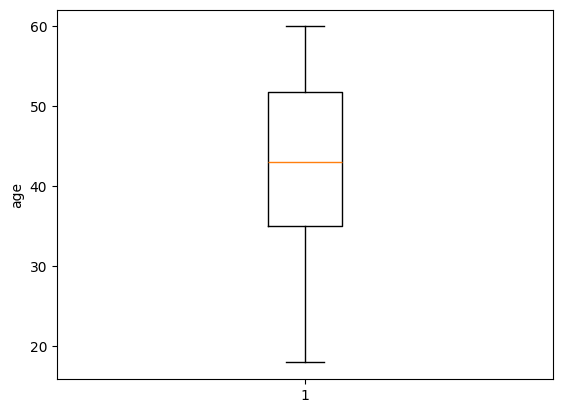

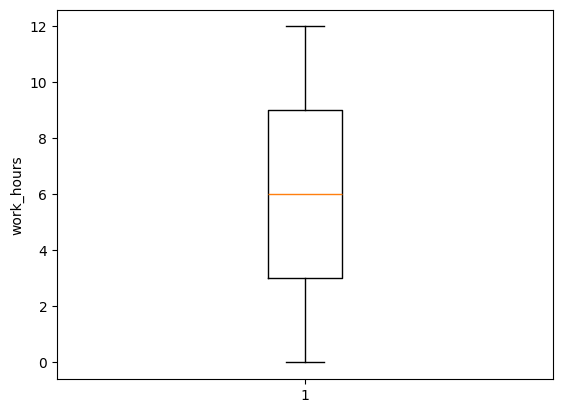

In [4]:
for var in ['age', 'work_hours']:
    plt.boxplot(df[var])
    plt.ylabel(var)
    plt.show()

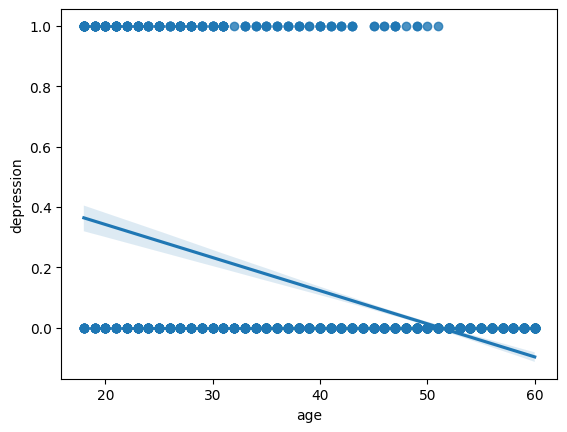

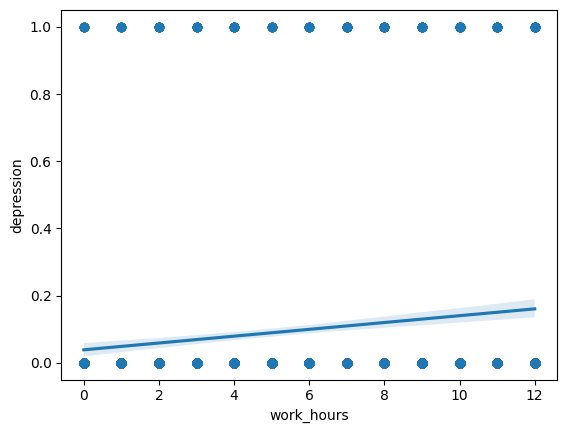

In [5]:
for var in ['age', 'work_hours']:
    sns.regplot(df, x=var, y='depression')
    plt.show()

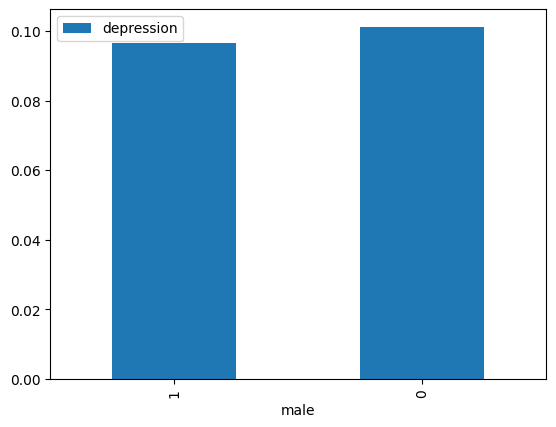

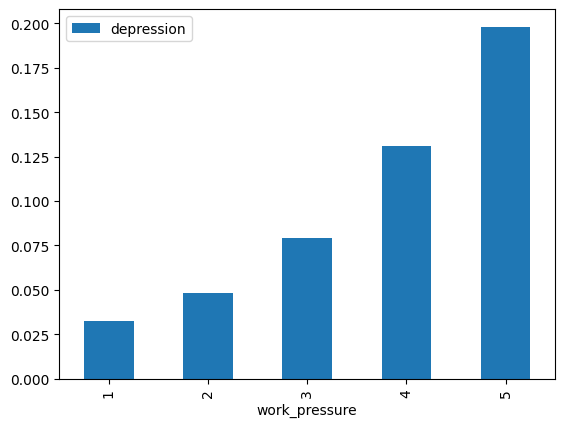

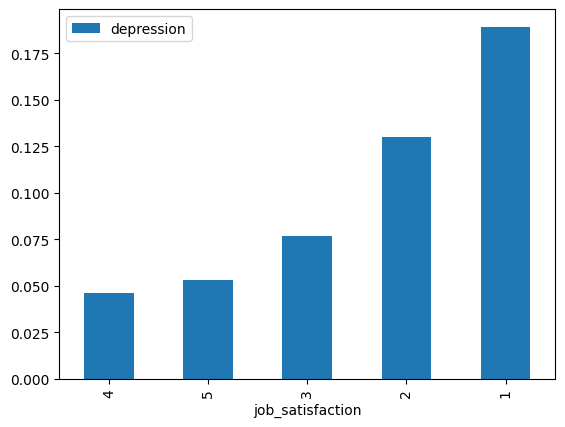

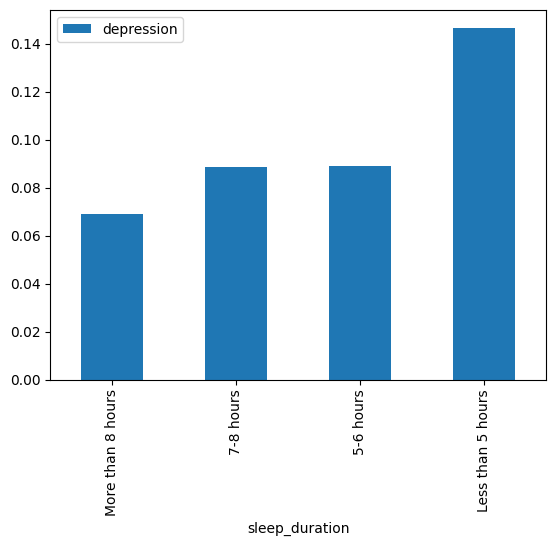

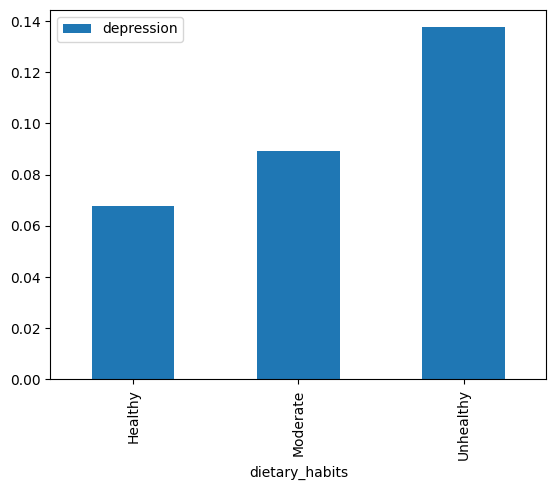

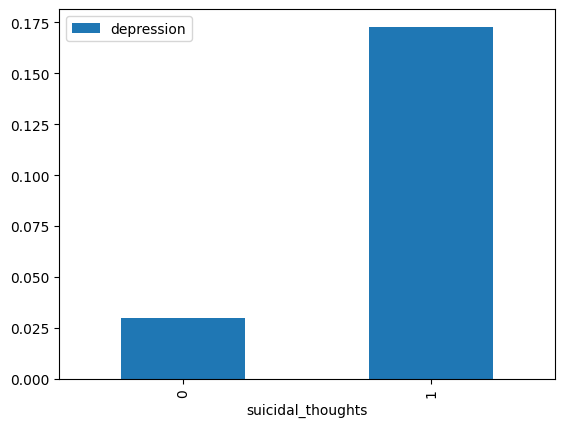

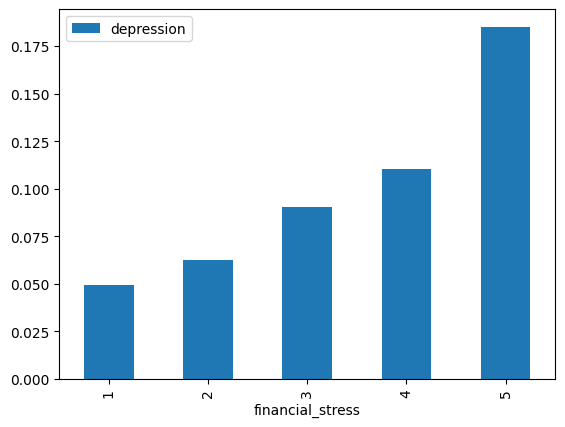

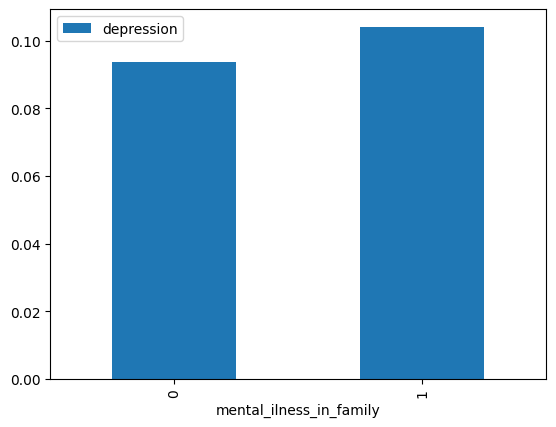

In [6]:
for var in df.drop(['age', 'work_hours', 'depression'], axis=1):
    df[[var, 'depression']].groupby(var).mean().sort_values(by = 'depression').plot(kind = 'bar')
    plt.show()

In [7]:
f_list = []
p_list = []

for var in df.drop('depression', axis=1).columns.to_list():
    formula = 'depression~' + var
    model = ols(formula, df).fit()
    f_list.append(sm.stats.anova_lm(model).iloc[0,3])
    p_list.append(sm.stats.anova_lm(model).iloc[0,4])

f_test_df = pd.DataFrame({'variable': df.drop('depression', axis=1).columns.to_list(), 'F_score': f_list, 'p': p_list})
f_test_df['significance'] = (f_test_df.p <= 0.05).astype(int)
f_test_df

,variable,F_score,p,significance
0,male,0.121272,7.276952e-01,0
1,age,442.717881,3.717419e-89,1
2,work_pressure,83.297255,1.640061e-19,1
3,job_satisfaction,58.783249,2.698339e-14,1
4,sleep_duration,6.594031,1.966019e-04,1
5,dietary_habits,10.124750,4.211547e-05,1
6,suicidal_thoughts,124.507142,4.128311e-28,1
7,work_hours,34.413661,5.181671e-09,1
8,financial_stress,48.298537,4.898268e-12,1
9,mental_ilness_in_family,0.632159,4.266563e-01,0


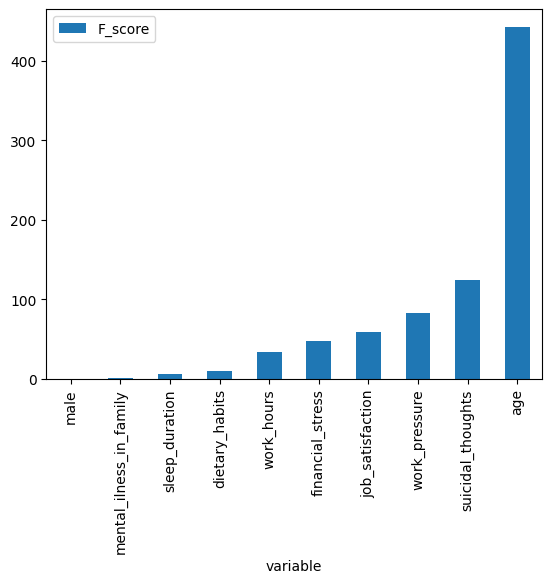

In [8]:
f_test_df[['variable', 'F_score']].set_index('variable').sort_values(by = 'F_score').plot(kind = 'bar')
plt.show()

In [9]:
job_satisfaction_df = df[['job_satisfaction', 'depression']].groupby('job_satisfaction').mean().sort_values(by='depression').reset_index()
job_satisfaction_df

,job_satisfaction,depression
0,4,0.045918
1,5,0.053364
2,3,0.076733
3,2,0.129930
4,1,0.189394


In [10]:
df.job_satisfaction.value_counts()

job_satisfaction
5    431
2    431
3    404
1    396
4    392
Name: count, dtype: int64

In [11]:
df.job_satisfaction = df.job_satisfaction.replace(5, 4)
df.job_satisfaction.value_counts()

job_satisfaction
4    823
2    431
3    404
1    396
Name: count, dtype: int64

In [12]:
job_satisfaction_df = df[['job_satisfaction', 'depression']].groupby('job_satisfaction').mean().sort_values(by='depression').reset_index()
job_satisfaction_df

,job_satisfaction,depression
0,4,0.049818
1,3,0.076733
2,2,0.129930
3,1,0.189394


In [13]:
sleep_duration_df = df[['sleep_duration', 'depression']].groupby('sleep_duration').mean().sort_values(by='depression').reset_index()
sleep_duration_df.columns = ['sleep_duration', 'sleep_duration_code']
sleep_duration_df.to_csv('sleep_duration_encoding.csv', index = False)
sleep_duration_df

,sleep_duration,sleep_duration_code
0,More than 8 hours,0.068826
1,7-8 hours,0.088679
2,5-6 hours,0.089109
3,Less than 5 hours,0.146667


In [14]:
analyzed_df = pd.merge(df, sleep_duration_df, on='sleep_duration').drop('sleep_duration', axis=1)
analyzed_df.head()

,male,age,work_pressure,job_satisfaction,dietary_habits,suicidal_thoughts,work_hours,financial_stress,mental_ilness_in_family,depression,sleep_duration_code
0,0,37,2,4,Moderate,0,6,2,0,0,0.088679
1,1,60,4,3,Unhealthy,1,0,4,1,0,0.089109
2,0,42,2,3,Moderate,0,0,2,0,0,0.089109
3,0,44,3,4,Healthy,1,1,2,1,0,0.088679
4,1,48,4,3,Moderate,1,6,5,1,0,0.088679


In [15]:
dietary_habits_df = df[['dietary_habits', 'depression']].groupby('dietary_habits').mean().sort_values(by='dietary_habits').reset_index()
dietary_habits_df.columns = ['dietary_habits', 'dietary_habits_code']
dietary_habits_df.to_csv('dietary_habits_encoding.csv', index = False)
dietary_habits_df

,dietary_habits,dietary_habits_code
0,Healthy,0.067548
1,Moderate,0.089394
2,Unhealthy,0.137447


In [16]:
analyzed_df = pd.merge(analyzed_df, dietary_habits_df, on='dietary_habits').drop('dietary_habits', axis=1)
analyzed_df.head()

,male,age,work_pressure,job_satisfaction,suicidal_thoughts,work_hours,financial_stress,mental_ilness_in_family,depression,sleep_duration_code,dietary_habits_code
0,0,37,2,4,0,6,2,0,0,0.088679,0.089394
1,1,60,4,3,1,0,4,1,0,0.089109,0.137447
2,0,42,2,3,0,0,2,0,0,0.089109,0.089394
3,0,44,3,4,1,1,2,1,0,0.088679,0.067548
4,1,48,4,3,1,6,5,1,0,0.088679,0.089394


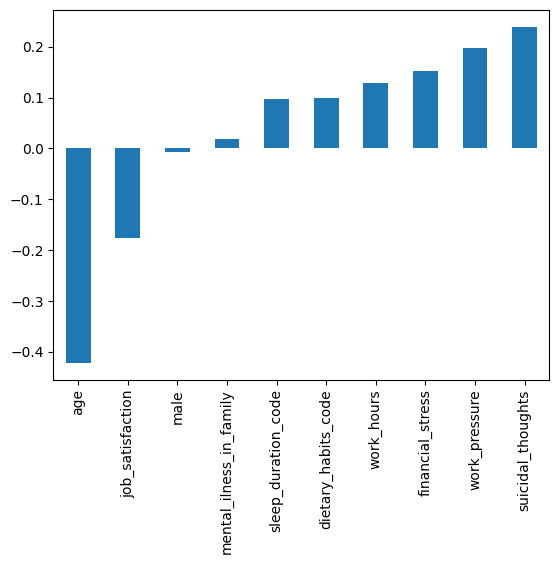

In [17]:
analyzed_df.corr()['depression'].drop('depression').sort_values().plot(kind = 'bar')
plt.show()

In [18]:
var_list = analyzed_df.drop('depression', axis=1).columns.to_list()
r_list = []
p_list = []

for var in var_list:
    r_list.append(pearsonr(analyzed_df[var], analyzed_df.depression)[0])
    p_list.append(pearsonr(analyzed_df[var], analyzed_df.depression)[1])

r_test_df = pd.DataFrame({'variable': var_list, 'r': r_list, 'p': p_list})
r_test_df['significance'] = (r_test_df.p <= 0.05).astype(int)
r_test_df

,variable,r,p,significance
0,male,-0.007687,7.276952e-01,0
1,age,-0.421263,3.717419e-89,1
2,work_pressure,0.197509,1.640061e-19,1
3,job_satisfaction,-0.176570,7.574226e-16,1
4,suicidal_thoughts,0.239176,4.128311e-28,1
5,work_hours,0.128430,5.181671e-09,1
6,financial_stress,0.151644,4.898268e-12,1
7,mental_ilness_in_family,0.017549,4.266563e-01,0
8,sleep_duration_code,0.097763,9.052244e-06,1
9,dietary_habits_code,0.098876,7.140931e-06,1


In [19]:
field_list = list(r_test_df[r_test_df.significance == 1]['variable'])
field_list.append('depression')
analyzed_df = analyzed_df[field_list]
analyzed_df.head()

,age,work_pressure,job_satisfaction,suicidal_thoughts,work_hours,financial_stress,sleep_duration_code,dietary_habits_code,depression
0,37,2,4,0,6,2,0.088679,0.089394,0
1,60,4,3,1,0,4,0.089109,0.137447,0
2,42,2,3,0,0,2,0.089109,0.089394,0
3,44,3,4,1,1,2,0.088679,0.067548,0
4,48,4,3,1,6,5,0.088679,0.089394,0


In [20]:
analyzed_df.to_csv('analyzed_data.csv', index = False)